In [92]:
# print_function for compatibility with Python 3
from __future__ import print_function 
#print('Print function from python 3')

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

import calendar
import datetime

In [93]:
df = pd.read_csv('turnstile_180310.txt')

In [94]:
df.columns = df.columns.str.strip()

In [95]:
df['turnstile_id'] = df['C/A'] + '_' + df['UNIT'] + '_' + df['SCP'] + '_' + df['STATION']

In [96]:
df['date'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')

In [97]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile_id,date
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,03:00:00,REGULAR,6535802,2213345,A002_R051_02-00-00_59 ST,2018-03-03
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,07:00:00,REGULAR,6535813,2213356,A002_R051_02-00-00_59 ST,2018-03-03
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,11:00:00,REGULAR,6535865,2213436,A002_R051_02-00-00_59 ST,2018-03-03
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,15:00:00,REGULAR,6536048,2213481,A002_R051_02-00-00_59 ST,2018-03-03
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,19:00:00,REGULAR,6536326,2213531,A002_R051_02-00-00_59 ST,2018-03-03


In [98]:
df['DATE_TIME'] = df['DATE'] + ' ' + df['TIME']

In [99]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'],format="%m/%d/%Y %H:%M:%S")

In [100]:
df.sample(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile_id,date,DATE_TIME
154051,R238,R046,00-03-04,GRD CNTRL-42 ST,4567S,IRT,03/09/2018,19:00:00,REGULAR,34504548,8467627,R238_R046_00-03-04_GRD CNTRL-42 ST,2018-03-09,2018-03-09 19:00:00
38926,J030,R005,00-00-00,85 ST-FOREST PK,J,BMT,03/05/2018,03:00:00,REGULAR,7418065,7031712,J030_R005_00-00-00_85 ST-FOREST PK,2018-03-05,2018-03-05 03:00:00
53315,N073,R013,02-00-08,34 ST-PENN STA,ACE,IND,03/05/2018,15:00:00,REGULAR,2557496,2621108,N073_R013_02-00-08_34 ST-PENN STA,2018-03-05,2018-03-05 15:00:00
49365,N062,R011,01-03-01,42 ST-PORT AUTH,ACENQRS1237W,IND,03/09/2018,23:00:00,REGULAR,14326492,6335016,N062_R011_01-03-01_42 ST-PORT AUTH,2018-03-09,2018-03-09 23:00:00
10878,A060,R001,00-00-03,WHITEHALL S-FRY,R1W,BMT,03/06/2018,20:00:00,REGULAR,2187132,134286,A060_R001_00-00-03_WHITEHALL S-FRY,2018-03-06,2018-03-06 20:00:00
75444,N304,R015,01-01-01,5 AV/53 ST,EM,IND,03/07/2018,21:00:00,REGULAR,5147968,2971445,N304_R015_01-01-01_5 AV/53 ST,2018-03-07,2018-03-07 21:00:00
127796,R118,R343,01-00-01,FRANKLIN ST,1,IRT,03/03/2018,20:00:00,REGULAR,467027,376055,R118_R343_01-00-01_FRANKLIN ST,2018-03-03,2018-03-03 20:00:00
115939,PTH07,R550,00-00-08,CITY / BUS,1,PTH,03/03/2018,10:17:46,REGULAR,164382,637768,PTH07_R550_00-00-08_CITY / BUS,2018-03-03,2018-03-03 10:17:46
124596,R101,R001,02-03-01,SOUTH FERRY,1RW,IRT,03/09/2018,04:00:00,REGULAR,141840,276152,R101_R001_02-03-01_SOUTH FERRY,2018-03-09,2018-03-09 04:00:00
14165,B013,R196,01-05-01,PROSPECT PARK,BQS,BMT,03/08/2018,11:00:00,REGULAR,14,1794,B013_R196_01-05-01_PROSPECT PARK,2018-03-08,2018-03-08 11:00:00


In [101]:
df_temp=df[['turnstile_id','date','DATE_TIME','ENTRIES','EXITS','STATION']]

In [102]:
df_temp.sample(10)

,turnstile_id,date,DATE_TIME,ENTRIES,EXITS,STATION
169731,R327_R361_01-05-01_PELHAM PKWY,2018-03-03,2018-03-03 20:00:00,1,499,PELHAM PKWY
197281,R730_R431_00-00-01_EASTCHSTER/DYRE,2018-03-07,2018-03-07 08:00:00,6183703,7938355,EASTCHSTER/DYRE
110080,N701_R571_00-00-03_86 ST-2 AVE,2018-03-07,2018-03-07 04:00:00,566945,398402,86 ST-2 AVE
157095,R245_R051_00-03-00_59 ST,2018-03-03,2018-03-03 11:00:00,10817202,10131280,59 ST
4271,A030_R083_01-06-00_23 ST,2018-03-09,2018-03-09 15:00:00,7746485,4176553,23 ST
156735,R244_R050_00-06-02_59 ST,2018-03-06,2018-03-06 19:00:00,5023139,1047092,59 ST
98545,N519A_R461_01-05-01_B'WAY-LAFAYETTE,2018-03-05,2018-03-05 08:00:00,50331648,16778459,B'WAY-LAFAYETTE
172363,R408_R449_00-00-00_E 149 ST,2018-03-07,2018-03-07 08:00:00,4720071,2068998,E 149 ST
38848,J028_R004_00-00-03_75 ST-ELDERTS,2018-03-06,2018-03-06 03:00:00,903684,1884101,75 ST-ELDERTS
167558,R312_R405_00-05-00_JACKSON AV,2018-03-07,2018-03-07 07:47:01,117834775,221802,JACKSON AV


In [103]:
df_temp1=(df_temp
 .sort_values(by=['turnstile_id','DATE_TIME'])
 .groupby(['turnstile_id','date','STATION'])
 .diff())

In [104]:
df_temp1.head()

,DATE_TIME,ENTRIES,EXITS
0,NaT,NaN,NaN
1,04:00:00,11.0,11.0
2,04:00:00,52.0,80.0
3,04:00:00,183.0,45.0
4,04:00:00,278.0,50.0


In [105]:
df_temp2=(df_temp
 .sort_values(by=['turnstile_id','DATE_TIME']))

In [106]:
df_temp2.head()

,turnstile_id,date,DATE_TIME,ENTRIES,EXITS,STATION
0,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 03:00:00,6535802,2213345,59 ST
1,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 07:00:00,6535813,2213356,59 ST
2,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 11:00:00,6535865,2213436,59 ST
3,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 15:00:00,6536048,2213481,59 ST
4,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 19:00:00,6536326,2213531,59 ST


In [107]:
df_temp1['turnstile_id']=df_temp2['turnstile_id']

In [108]:
df_temp1['STATION']=df_temp2['STATION']

In [109]:
df_temp1['date']=df_temp2['date']

In [110]:
df_temp1.head(20)

,DATE_TIME,ENTRIES,EXITS,turnstile_id,STATION,date
0,NaT,NaN,NaN,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
1,04:00:00,11.0,11.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
2,04:00:00,52.0,80.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
3,04:00:00,183.0,45.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
4,04:00:00,278.0,50.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
5,04:00:00,161.0,31.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
6,NaT,NaN,NaN,A002_R051_02-00-00_59 ST,59 ST,2018-03-04
7,04:00:00,8.0,9.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-04
8,04:00:00,50.0,47.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-04
9,04:00:00,147.0,43.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-04


In [111]:
df_temp1.dropna(axis=0,inplace=True)

In [112]:
df_final=pd.DataFrame()
df_final=df_temp1[['ENTRIES','turnstile_id','STATION','date']]

In [113]:
df_final.head()

,ENTRIES,turnstile_id,STATION,date
1,11.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
2,52.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
3,183.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
4,278.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
5,161.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03


In [114]:
df_final1=(df_final
 .groupby(['turnstile_id','date','STATION'])
 .sum())

In [115]:
df_final1['ENTRIES'].max()

10128.0

In [116]:
df_anal=df_final1.reset_index()

In [117]:
type(df_final1)

pandas.core.frame.DataFrame

In [118]:
df_final1.columns

Index(['ENTRIES'], dtype='object')

In [119]:
df_anal.head()

,turnstile_id,date,STATION,ENTRIES
0,A002_R051_02-00-00_59 ST,2018-03-03,59 ST,685.0
1,A002_R051_02-00-00_59 ST,2018-03-04,59 ST,519.0
2,A002_R051_02-00-00_59 ST,2018-03-05,59 ST,1379.0
3,A002_R051_02-00-00_59 ST,2018-03-06,59 ST,1472.0
4,A002_R051_02-00-00_59 ST,2018-03-07,59 ST,979.0


In [120]:
top_20_station=df_anal.sort_values(by='ENTRIES',ascending=False).head(68)

In [129]:
top_20_station['STATION'].unique()

array(['GRD CNTRL-42 ST', '59 ST COLUMBUS', 'BROADWAY', 'JAMAICA CENTER',
       'WOODHAVEN BLVD', 'BEDFORD AV', '1 AV', '14 ST-UNION SQ',
       '57 ST-7 AV', '34 ST-HERALD SQ'], dtype=object)

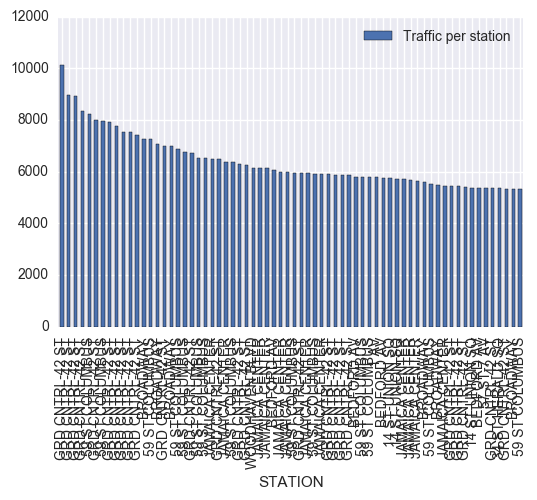

In [127]:
top_20_station.plot(kind='bar', x='STATION', y='ENTRIES',label='Traffic per station')
plt.xlabel('STATION')

,ENTRIES,turnstile_id,STATION,date
44456,32.0,N025_R102_01-00-00_125 ST,125 ST,2018-03-03
44457,193.0,N025_R102_01-00-00_125 ST,125 ST,2018-03-03
44458,191.0,N025_R102_01-00-00_125 ST,125 ST,2018-03-03
44459,205.0,N025_R102_01-00-00_125 ST,125 ST,2018-03-03
44460,134.0,N025_R102_01-00-00_125 ST,125 ST,2018-03-03
44462,24.0,N025_R102_01-00-00_125 ST,125 ST,2018-03-04
44463,142.0,N025_R102_01-00-00_125 ST,125 ST,2018-03-04
44464,165.0,N025_R102_01-00-00_125 ST,125 ST,2018-03-04
44465,198.0,N025_R102_01-00-00_125 ST,125 ST,2018-03-04
44466,97.0,N025_R102_01-00-00_125 ST,125 ST,2018-03-04


In [124]:
df[df['STATION']=='125 ST'].head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile_id,date,DATE_TIME
44455,N025,R102,01-00-00,125 ST,ACBD,IND,03/03/2018,03:00:00,REGULAR,5465056,4398877,N025_R102_01-00-00_125 ST,2018-03-03,2018-03-03 03:00:00
44456,N025,R102,01-00-00,125 ST,ACBD,IND,03/03/2018,07:00:00,REGULAR,5465088,4398895,N025_R102_01-00-00_125 ST,2018-03-03,2018-03-03 07:00:00
44457,N025,R102,01-00-00,125 ST,ACBD,IND,03/03/2018,11:00:00,REGULAR,5465281,4398991,N025_R102_01-00-00_125 ST,2018-03-03,2018-03-03 11:00:00
44458,N025,R102,01-00-00,125 ST,ACBD,IND,03/03/2018,15:00:00,REGULAR,5465472,4399130,N025_R102_01-00-00_125 ST,2018-03-03,2018-03-03 15:00:00
44459,N025,R102,01-00-00,125 ST,ACBD,IND,03/03/2018,19:00:00,REGULAR,5465677,4399350,N025_R102_01-00-00_125 ST,2018-03-03,2018-03-03 19:00:00
44460,N025,R102,01-00-00,125 ST,ACBD,IND,03/03/2018,23:00:00,REGULAR,5465811,4399483,N025_R102_01-00-00_125 ST,2018-03-03,2018-03-03 23:00:00
44461,N025,R102,01-00-00,125 ST,ACBD,IND,03/04/2018,03:00:00,REGULAR,5465845,4399554,N025_R102_01-00-00_125 ST,2018-03-04,2018-03-04 03:00:00
44462,N025,R102,01-00-00,125 ST,ACBD,IND,03/04/2018,07:00:00,REGULAR,5465869,4399570,N025_R102_01-00-00_125 ST,2018-03-04,2018-03-04 07:00:00
44463,N025,R102,01-00-00,125 ST,ACBD,IND,03/04/2018,11:00:00,REGULAR,5466011,4399655,N025_R102_01-00-00_125 ST,2018-03-04,2018-03-04 11:00:00
44464,N025,R102,01-00-00,125 ST,ACBD,IND,03/04/2018,15:00:00,REGULAR,5466176,4399805,N025_R102_01-00-00_125 ST,2018-03-04,2018-03-04 15:00:00
